In [43]:
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch

In [44]:
# Define some functions
def create_bandpass_filter(lowcut, highcut, fs, order=4):
    Wn = [lowcut / (fs / 2), highcut / (fs / 2)]
    b, a = butter(order, Wn, btype="bandpass")
    return b, a

def apply_bandpass_filter(data, b, a):
    return filtfilt(b, a, data)


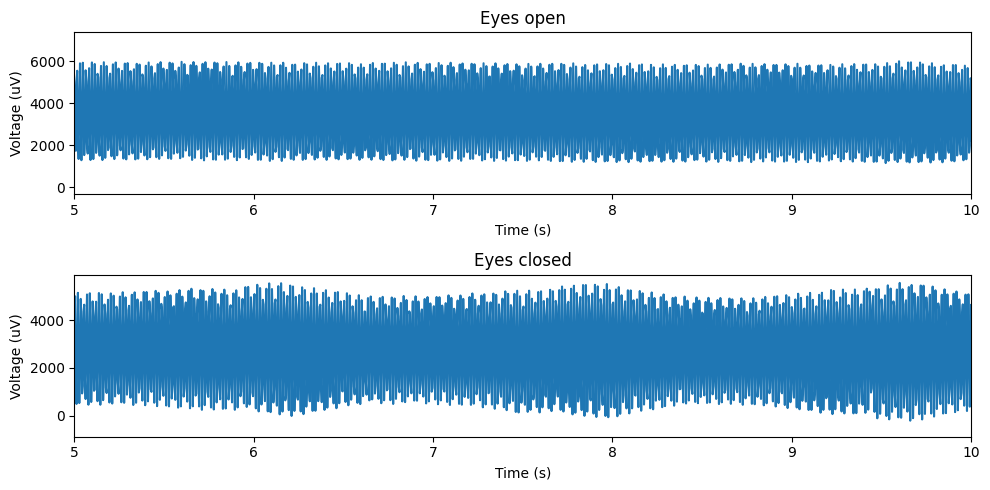

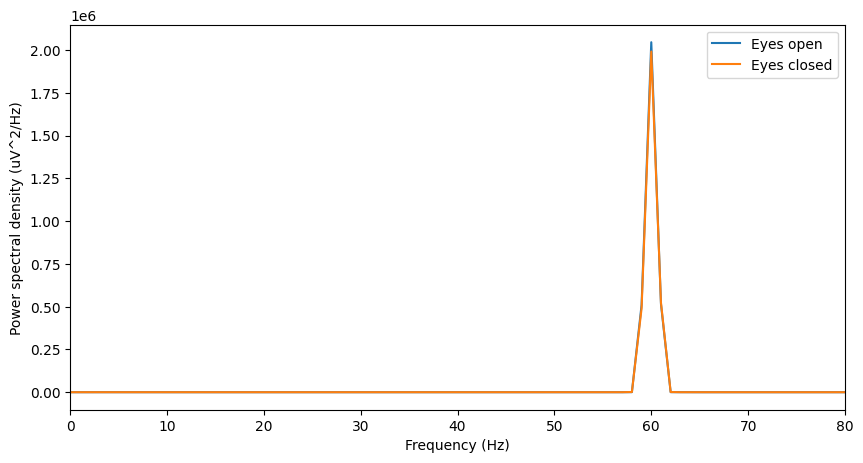

In [45]:
# 2. Load the data, this data is from Fz, a frontal EEG channel.
# The sampling rate is 256 Hz.
eyes_open = np.load('eyes_open.npy')
eyes_closed = np.load('eyes_closed.npy')
fsample = 256

# 
f, eyes_open_psd = welch(eyes_open, fsample, nperseg=fsample)
f, eyes_closed_psd = welch(eyes_closed, fsample, nperseg=fsample)

# Create a time vector
time = np.arange(0, len(eyes_open)/fsample, 1/fsample)

# Plot the raw EEG in a subplot with the eyes open and eyes closed data
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, eyes_open)
plt.title('Eyes open')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.xlim([5, 10])
plt.subplot(2, 1, 2)
plt.plot(time, eyes_closed)
plt.title('Eyes closed')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.xlim([5, 10])
plt.tight_layout()
plt.show()

# Plot the power spectral density of the eyes open and eyes closed data
plt.figure(figsize=(10, 5))
plt.plot(f, eyes_open_psd, label='Eyes open')
plt.plot(f, eyes_closed_psd, label='Eyes closed')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2/Hz)')
plt.legend()
plt.xlim([0, 80])
plt.show()



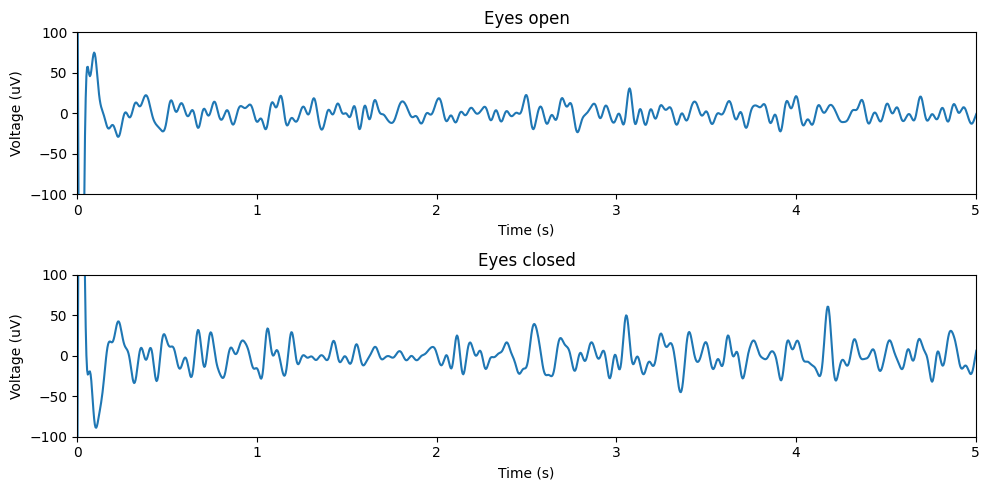

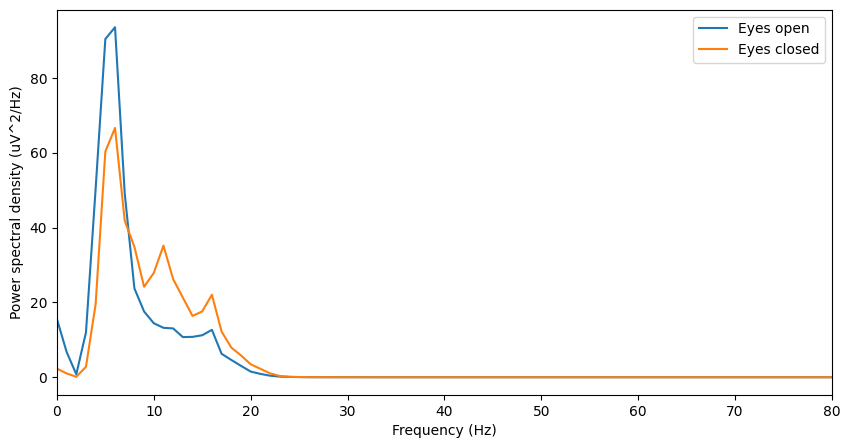

In [46]:
# Bandpass filter the data between 1 and 40 Hz
b, a = create_bandpass_filter(4, 20, fsample)

eyes_open_filtered = apply_bandpass_filter(eyes_open, b, a)
eyes_closed_filtered = apply_bandpass_filter(eyes_closed, b, a)

# Plot the filtered EEG in a subplot with the eyes open and eyes closed data

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, eyes_open_filtered)
plt.title('Eyes open')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.xlim([0, 5])
plt.ylim([-100, 100])
plt.subplot(2, 1, 2)
plt.plot(time, eyes_closed_filtered)
plt.title('Eyes closed')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')
plt.xlim([0, 5])
plt.ylim([-100, 100])
plt.tight_layout()
plt.show()


# Calculate the power spectral density of the filtered data
f, eyes_open_filtered_psd = welch(eyes_open_filtered, fsample, nperseg=fsample)
f, eyes_closed_filtered_psd = welch(eyes_closed_filtered, fsample, nperseg=fsample)

# Plot the power spectral density of the filtered eyes open and eyes closed data
plt.figure(figsize=(10, 5))
plt.plot(f, eyes_open_filtered_psd, label='Eyes open')
plt.plot(f, eyes_closed_filtered_psd, label='Eyes closed')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2/Hz)')
plt.legend()
plt.xlim([0, 80])
plt.show()



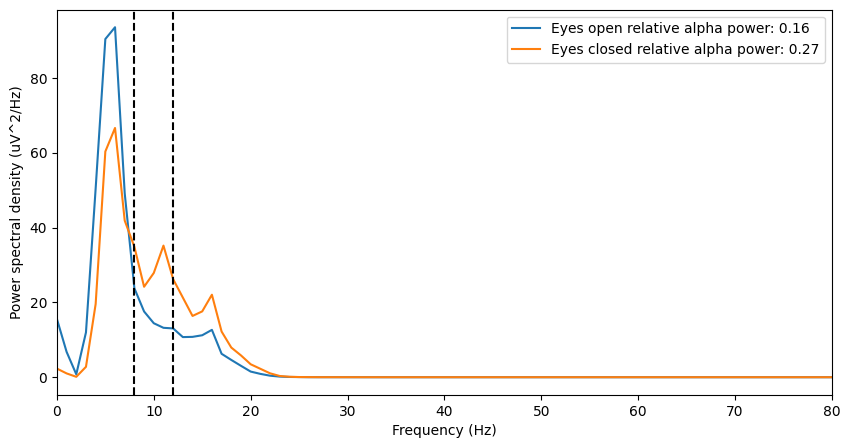

In [47]:
# Calculate the bandpower in the alpha (8-12 Hz) band
def bandpower(psd, freqs, band):
    idx_band = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.trapezoid(psd[idx_band], freqs[idx_band])

alpha_band = [8, 12]
filter_band = [4, 20]

# Calculate the alpha power in the filtered data
eyes_open_alpha_power = bandpower(eyes_open_filtered_psd, f, alpha_band)
eyes_closed_alpha_power = bandpower(eyes_closed_filtered_psd, f, alpha_band)

# Calculate the total power in the filtered data
eyes_open_total_power = bandpower(eyes_open_filtered_psd, f, filter_band)
eyes_closed_total_power = bandpower(eyes_closed_filtered_psd, f, filter_band)

# Calculate the relative alpha power
eyes_open_relative_alpha_power = eyes_open_alpha_power / eyes_open_total_power
eyes_closed_relative_alpha_power = eyes_closed_alpha_power / eyes_closed_total_power


# Plot the power spectral density of the filtered eyes open and eyes closed data
plt.figure(figsize=(10, 5))
plt.plot(f, eyes_open_filtered_psd)
plt.plot(f, eyes_closed_filtered_psd)
# plot black lines at the alpha band
plt.axvline(alpha_band[0], color='k', linestyle='--')
plt.axvline(alpha_band[1], color='k', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2/Hz)')
plt.legend(["Eyes open relative alpha power: {:.2f}".format(eyes_open_relative_alpha_power),
            "Eyes closed relative alpha power: {:.2f}".format(eyes_closed_relative_alpha_power)])
plt.xlim([0, 80])
plt.show()


